In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
# DATASET = 'mnist'
DATASET = 'wine_quality'

if DATASET == 'mnist':
    DATASET_STR = 'MNIST'
elif DATASET == 'wine_quality':
    DATASET_STR = 'Wine Quality'

# METHOD = 'ICA'
# METHOD = 'RP'
METHOD = 'LLE'

# if METHOD == 'ICA':
#     metric = 'kurtosis'
# elif METHOD == 'RP' or METHOD == 'LLE':
#     metric = 'reconstruction_error'

if DATASET == 'mnist':
    metric = 'accuracy'
    metric_str = 'Accuracy'
elif DATASET == 'wine_quality':
    metric = 'mse'
    metric_str = 'Mean Squared Error'

# metric = 'reconstruction_error'
# metric_str = 'Reconstruction Error'

df = pd.read_csv(f'results/{DATASET}/{METHOD}_metrics.csv')

In [34]:
df.sort_values(by='num_components', inplace=True)

/Users/sdale/repos/gatech/machine_learning/unsupervised_learning/final_results/step_2/lle_wine_quality_mse.png


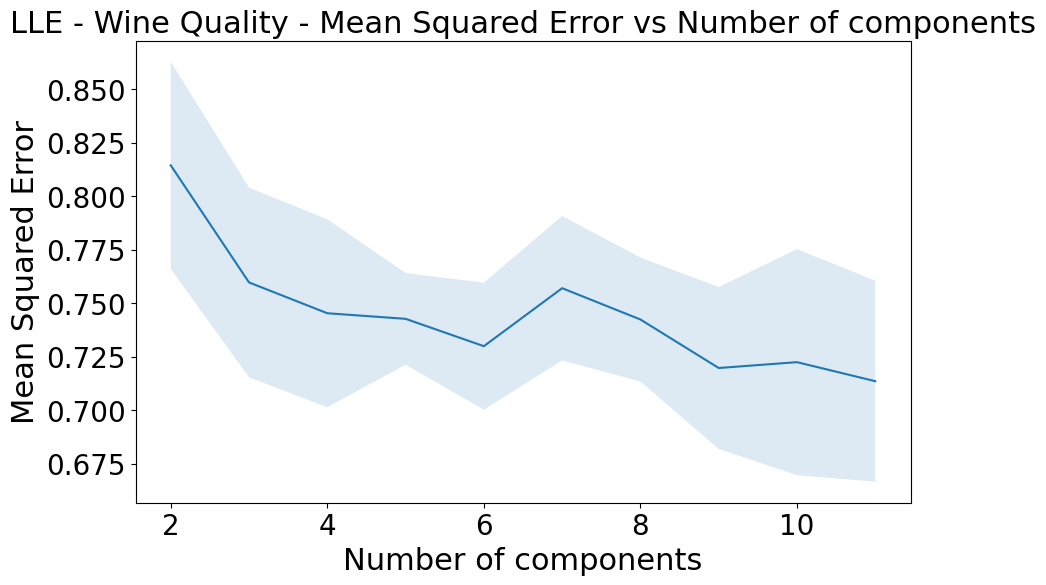

In [35]:
import os
fontsize = 22
plt.figure(figsize=(10, 6))
plt.plot(df['num_components'], df[f'{metric}_mean'], label=metric.upper())
plt.fill_between(
    np.array(df['num_components']), 
    np.array(df[f'{metric}_mean'])-np.array(df[f'{metric}_std']), 
    np.array(df[f'{metric}_mean'])+np.array(df[f'{metric}_std']), 
    alpha=0.15)

# plt.ylim(0.85, 1.0)
# plt.ylim(0.98, 0.99)
# plt.xlim(30, 35)
# plt.xlim(28, 35)

plt.xlabel('Number of components', fontsize=fontsize)
plt.ylabel(metric_str, fontsize=fontsize)
plt.title(f'{METHOD} - {DATASET_STR} - {metric_str} vs Number of components', fontsize=fontsize)

plt.xticks(fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)

# plt.xlim(-3.2, 4.2)
# plt.ylim(0.9, 1)

path = (f'/Users/sdale/repos/gatech/machine_learning/unsupervised_learning/final_results/step_2/'+
        f'{METHOD.lower()}_{DATASET.lower()}_{metric}.png')
print(path)
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path, bbox_inches='tight')